Analiza podatov umetnin v lasti galerij Tate, ki jih brskalnik uvršča v obdobje 1900-1945

In [300]:
import pandas as pd
import numpy as np
from pandas import DataFrame
pd.options.display.max_rows = 13
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

current_palette_11 = sns.color_palette("hls", 11)
sns.set_palette(current_palette_11)

umetnine = pd.read_csv('tate/umetnine.csv', index_col='id')


In [301]:
umetnine

,umetnik,letnica,naslov,lokacija
id,,,,
T07573,Marcel Duchamp,"('', 1917, 1917, ', replica 1964')",Fountain,"('Tate Modern', 'Level 4: Materials and Objects')"
T02343,Salvador Dalí,"('', 1937, 1937, '')",Metamorphosis of Narcissus,"('Tate Modern', 'Level 2: In the Studio')"
T03257,Salvador Dalí,"('', 1936, 1936, '')",Lobster Telephone,"('', '')"
T00648,Piet Mondrian,"('', 1937, 1942, '')","Composition with Yellow, Blue and Red","('Tate Liverpool', 'Constellations')"
T00414,Pablo Picasso,"('', 1913, 1913, '')","Bottle of Vieux Marc, Glass, Guitar and Newspaper","('Tate Modern', 'Level 4: Materials and Objects')"
N04948,Wassily Kandinsky,"('', 1910, 1911, '')",Cossacks,"('Tate Modern', 'Level 2: Start Display')"
...,...,...,...,...
P03084,Claude Shepperson,"('c.', 1917, 1917, '')",Casualty Clearing Station in France,"('View by appointment', '')"
P03077,Sir William Rothenstein,"('', 1917, 1917, '')",Drilling,"('View by appointment', '')"


Kot lahko opazimo sem podatke v surovi csv datoteki za stolpca "letnica" in "lokacija" vpisoval s tupli, zato jih bom najprej rastavil.

In [302]:
df = DataFrame(data = umetnine)
letnica_rascepljena = df['letnica'].apply(eval).apply(pd.Series)
letnica_rascepljena.columns =['prefiksni komentar letnice', 'leto začetka nastajanja', 'leto zaključka nastajanja', 'dodatni komentar ob letnici']

In [303]:
lokacija_rascepljena = df['lokacija'].apply(eval).apply(pd.Series)
lokacija_rascepljena.columns =['galerija ali muzej', 'razstava']

In [305]:
letnice_srednja_vrednost = letnica_rascepljena[['leto začetka nastajanja', 'leto zaključka nastajanja']].mean(axis=1)

In [306]:
letnice_vse = pd.concat([letnica_rascepljena, letnice_srednja_vrednost], axis=1)
letnice_vse.columns = ['prefiksni komentar letnice', 'leto začetka nastajanja', 'leto zaključka nastajanja', 'dodatni komentar ob letnici', 'srednja vrednost let nastajanja']

In [307]:
#frames = [umetnine, letnica_rascepljena, lokacija_rascepljena]
umetnine = pd.concat([umetnine, letnice_vse], axis=1)
umetnine = pd.concat([umetnine, lokacija_rascepljena], axis=1)
del umetnine['letnica']
del umetnine['lokacija']

V tabeli so prisotni prazni nizi: ker gre za irelevantne podatke, jih lahko odtranimo.

In [308]:
umetnine = umetnine.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)
umetnine

,umetnik,naslov,prefiksni komentar letnice,leto začetka nastajanja,leto zaključka nastajanja,dodatni komentar ob letnici,srednja vrednost let nastajanja,galerija ali muzej,razstava
id,,,,,,,,,
T07573,Marcel Duchamp,Fountain,NaN,1917,1917,", replica 1964",1917.0,Tate Modern,Level 4: Materials and Objects
T02343,Salvador Dalí,Metamorphosis of Narcissus,NaN,1937,1937,NaN,1937.0,Tate Modern,Level 2: In the Studio
T03257,Salvador Dalí,Lobster Telephone,NaN,1936,1936,NaN,1936.0,NaN,NaN
T00648,Piet Mondrian,"Composition with Yellow, Blue and Red",NaN,1937,1942,NaN,1939.5,Tate Liverpool,Constellations
T00414,Pablo Picasso,"Bottle of Vieux Marc, Glass, Guitar and Newspaper",NaN,1913,1913,NaN,1913.0,Tate Modern,Level 4: Materials and Objects
N04948,Wassily Kandinsky,Cossacks,NaN,1910,1911,NaN,1910.5,Tate Modern,Level 2: Start Display
...,...,...,...,...,...,...,...,...,...
P03084,Claude Shepperson,Casualty Clearing Station in France,c.,1917,1917,NaN,1917.0,View by appointment,NaN
P03077,Sir William Rothenstein,Drilling,NaN,1917,1917,NaN,1917.0,View by appointment,NaN


V podatkih imamo veliko primerov umetnin, ki so nastajale tudi več let: to nam omogoča, da vsa dela predstavimo v ravnini.

V spodnjem grafu lahko zlahka razberemo katera leta (oz. obdobja) so najbolj zastopana.

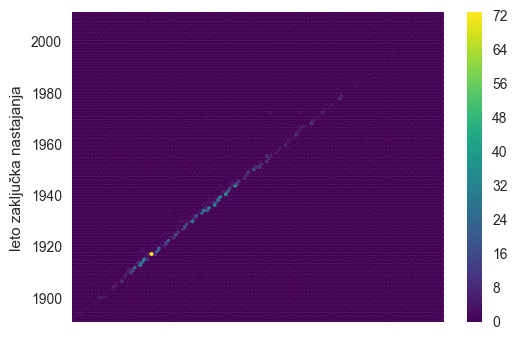

In [325]:
umetnine.plot.hexbin(x='leto začetka nastajanja', y='leto zaključka nastajanja', cmap='viridis')

če nas pa zanima odstopanje del, ki so nastajali več kot eno leto, je spodnji sledeči graf bolj prikladen. Opazimo lahko, da odvisnost vselej poteka dokaj linearno.

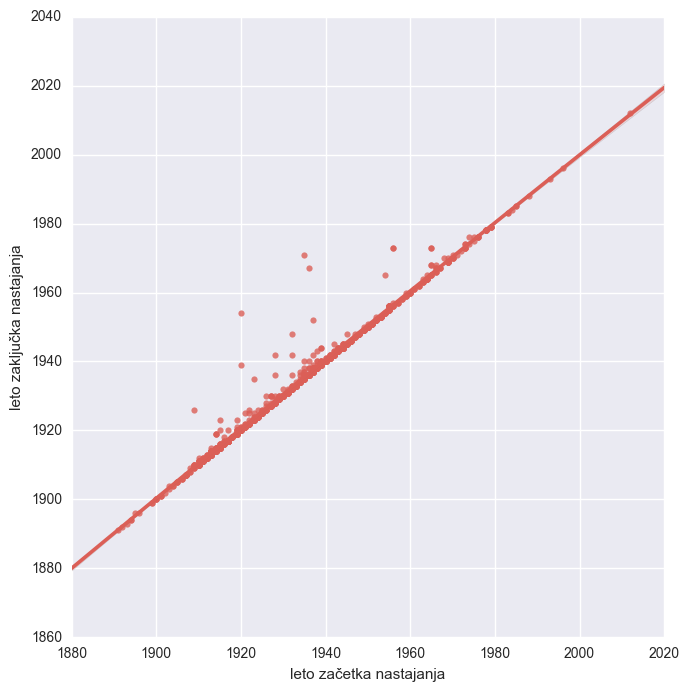

In [324]:
#umetnine.plot.scatter(x='leto začetka nastajanja', y='leto zaključka nastajanja', color='plum', figsize=(20, 10))
m = sns.FacetGrid(umetnine, size=(7), aspect=(1))
m.map(sns.regplot, 'leto začetka nastajanja', 'leto zaključka nastajanja', order=2)

Iz radovednosti poglejmo koliko del je nastalo po srednji vrednosti leta začetka in konca nastajanja.

In [321]:
stevilo_umetnin_po_srednji_vrednost_let_nastajanja = letnice_vse.groupby('srednja vrednost let nastajanja')
st_stevilo_umetnin = stevilo_umetnin_po_srednji_vrednost_let_nastajanja.size().count()


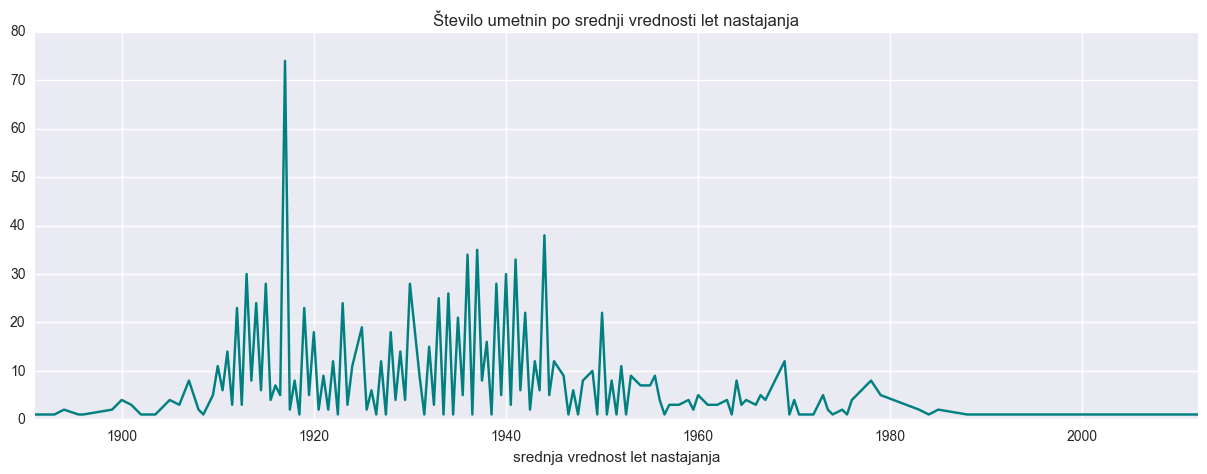

In [322]:
umetnine_na_leto = umetnine.groupby('srednja vrednost let nastajanja')
umetnine_na_leto.size().plot(figsize=(15,5), title = 'Število umetnin po srednji vrednosti let nastajanja', color='teal',  x_compat=True)

Za primerjavo pa še število umetnin po letnici začetka in konca nastajanja posamično.

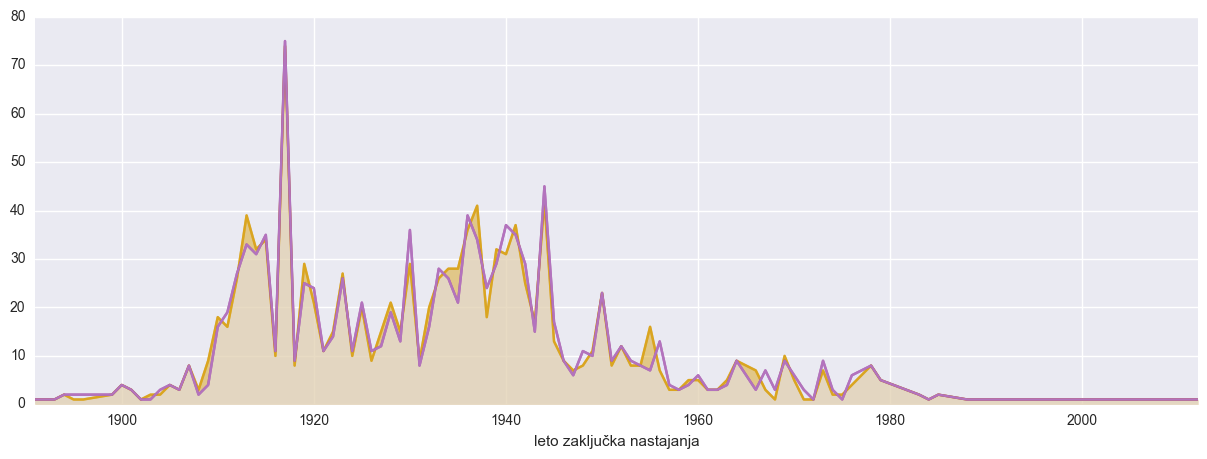

In [323]:
umetnine_zacetek = umetnine.groupby('leto začetka nastajanja')
umetnine_konec = umetnine.groupby('leto zaključka nastajanja')

umetnine_zacetek.size().plot(color='goldenrod', figsize=(15,5))
umetnine_zacetek.size().plot(kind='area', color='goldenrod', figsize=(15,5), stacked=False)

#umetnine_na_leto.size().plot(color='teal', figsize=(15,5))

umetnine_konec.size().plot(color='purple', figsize=(15,5))
umetnine_konec.size().plot(kind='area', color='lavender', figsize=(15,5), stacked=False)

Sedaj si pa bližje poglejmo podatke umetin, katere si lahko ogledamo.
V tortnem grafu se odstotki nanašajo le na skupno število del, ki si jih je mogoče ogledati.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000AE6D50ECF8>], dtype=object)

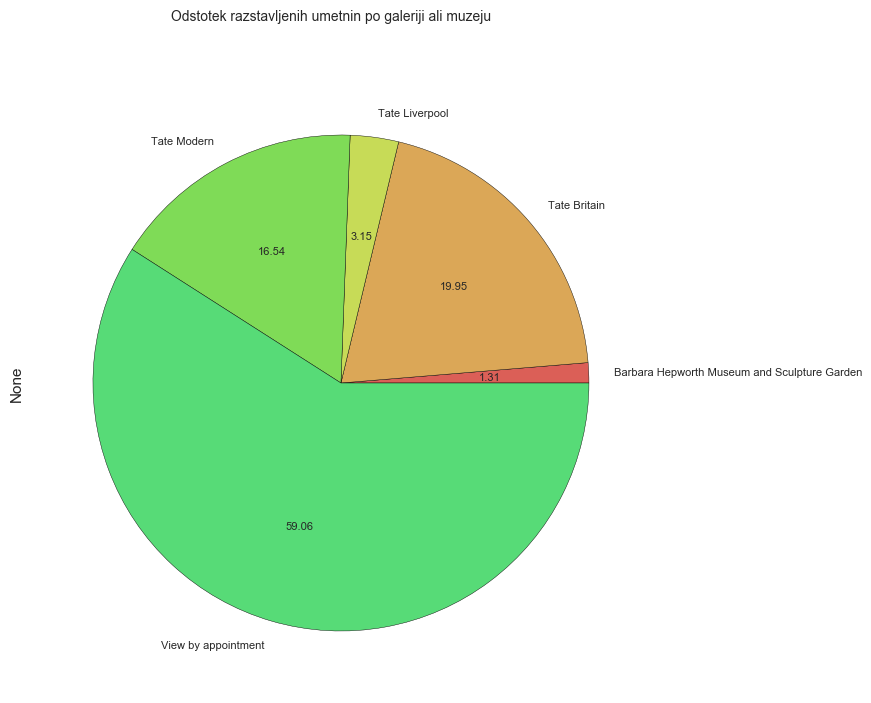

In [309]:
umetnine_po_galeriji_ali_muzeju = umetnine.groupby('galerija ali muzej')
umetnine_po_galeriji_ali_muzeju.size().plot.pie(figsize=(8, 8), subplots=True, autopct='%.2f', fontsize=8, title = 'Odstotek razstavljenih umetnin po galeriji ali muzeju')
#umetnine_po_galeriji_ali_muzeju.size().plot(kind = 'barh', color=['indigo', 'goldenrod', 'purple', 'violet', 'plum', 'pink'], title = 'Število razstavljenih umetnin po galeriji ali muzeju')

In [355]:
umetnine['galerija ali muzej'].value_counts()

View by appointment                             225
Tate Britain                                     76
Tate Modern                                      63
Tate Liverpool                                   12
Barbara Hepworth Museum and Sculpture Garden      5
Name: galerija ali muzej, dtype: int64

Pa poglejmo si še štvila del po razstavi.

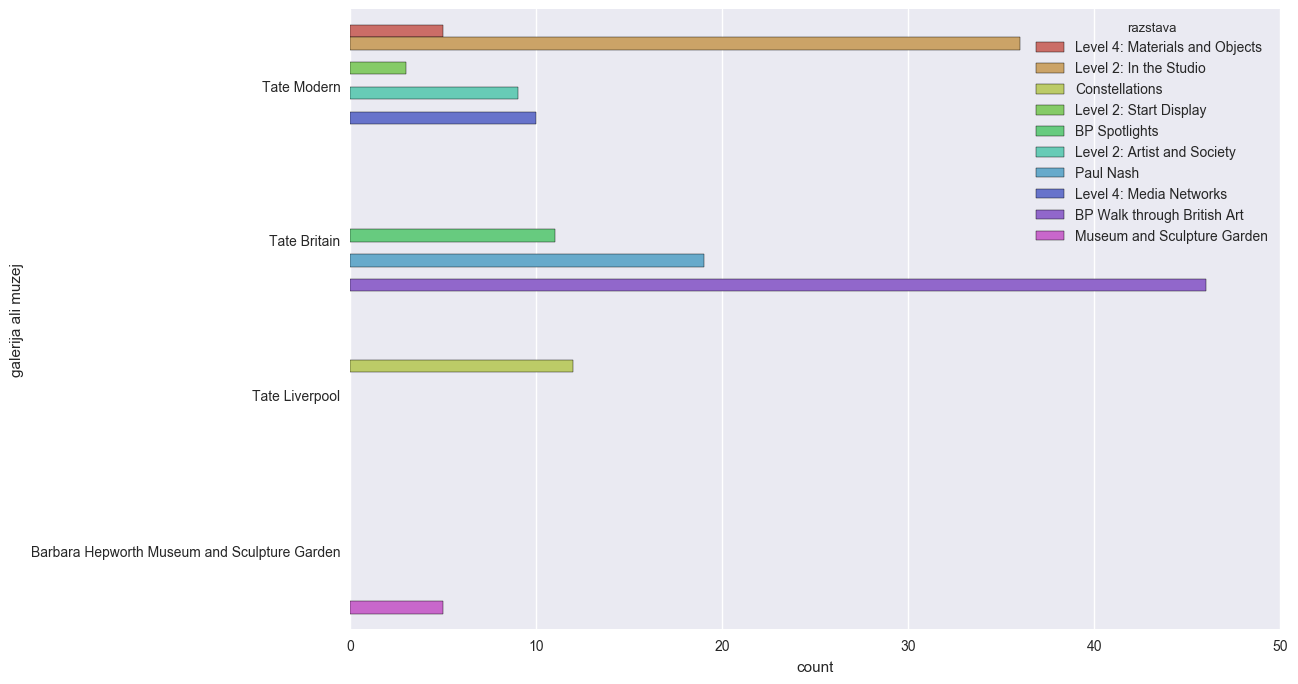

In [350]:
plt.figure(figsize=(12,8))
stevilo_galerija_razstava = sns.countplot(y='galerija ali muzej', hue='razstava', data=umetnine, order=('Tate Modern', 'Tate Britain', 'Tate Liverpool', 'Barbara Hepworth Museum and Sculpture Garden'), palette=current_palette_11)

In [356]:
umetnine['razstava'].value_counts()

BP Walk through British Art       46
Level 2: In the Studio            36
Paul Nash                         19
Constellations                    12
BP Spotlights                     11
Level 4: Media Networks           10
Level 2: Artist and Society        9
Museum and Sculpture Garden        5
Level 4: Materials and Objects     5
Level 2: Start Display             3
Name: razstava, dtype: int64

In [313]:
#umetnine_po_razstavi = umetnine.groupby('razstava')
#umetnine_po_razstavi.size().plot(kind = 'barh', color=['r', 'g', 'b', 'c', 'y'], title = 'Število razstavljenih umetnin po razstavi')

In njihovo porazdelitev na našem priljubljenem dvodimenzionalnem časovnem traku.

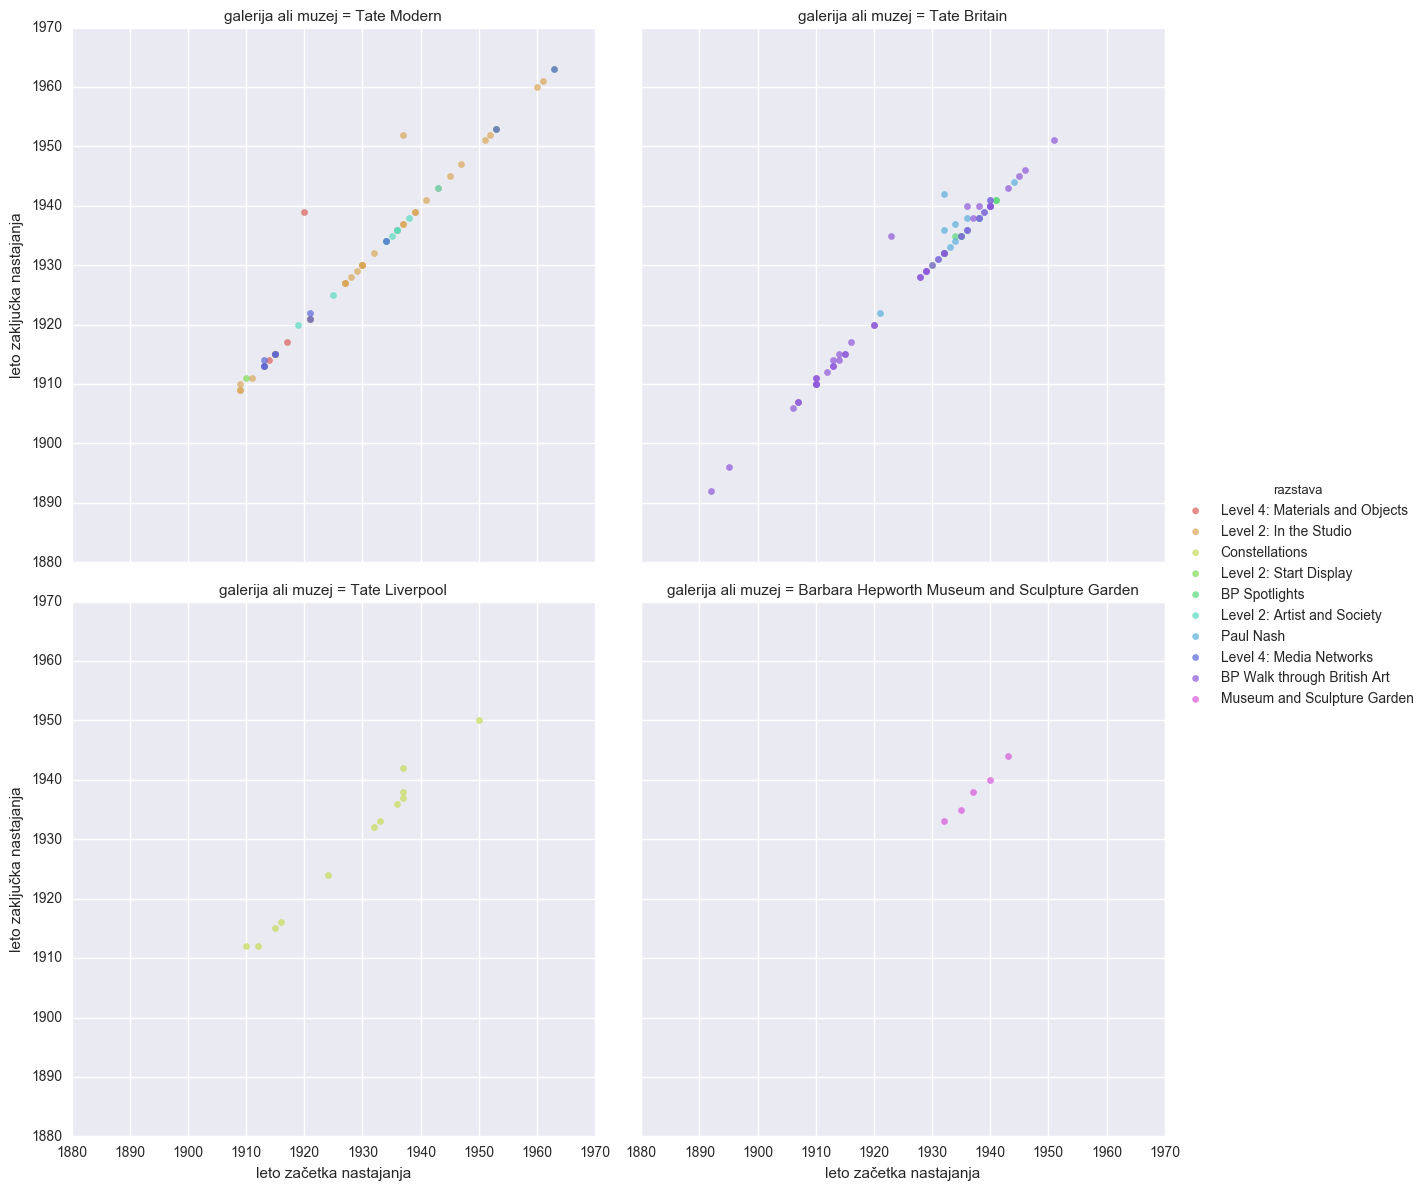

In [317]:
g = sns.FacetGrid(umetnine, col='galerija ali muzej', hue='razstava', col_wrap=(2), size=(6), aspect=(1), legend_out=True, col_order=('Tate Modern', 'Tate Britain', 'Tate Liverpool', 'Barbara Hepworth Museum and Sculpture Garden'), palette=current_palette_11)
g.map(plt.scatter, 'leto začetka nastajanja', 'leto zaključka nastajanja', alpha=.7)
g.add_legend()
g

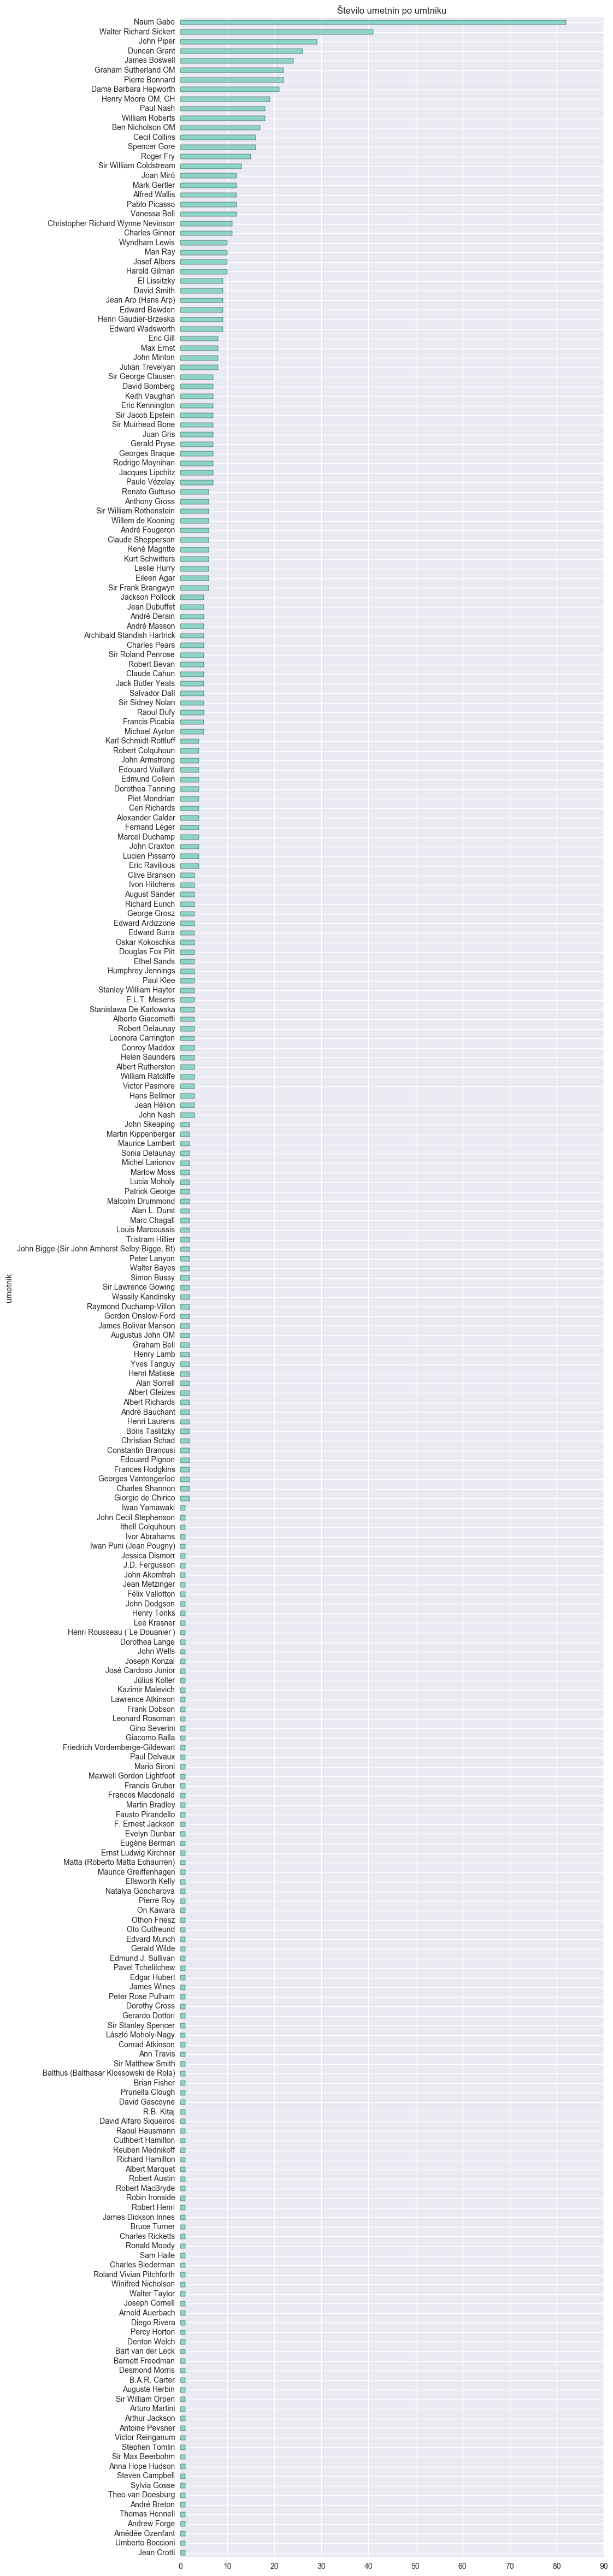

In [320]:
umetnine_po_umetnikih = umetnine.groupby('umetnik')
st_umetnin = umetnine_po_umetnikih.size().count()
graf_umetnikov = umetnine_po_umetnikih.size().sort_values(
    ascending=True).head(st_umetnin)
graf_umetnikov.name = 'umetniki'
graf_umetnikov.sort_values(ascending=True).plot(kind='barh', title = 'Število umetnin po umtniku', figsize=(10,60), cmap='Set3')

Še nekaj številskih podatkov: srednja vrednost srednje vrednosti nastajanja umetnin glede na posamezno galerijo ali muzej in nato še razstavo.

In [327]:
umetine_po_galeriji_ali_muzeju = umetnine.groupby('galerija ali muzej')
umetine_po_galeriji_ali_muzeju['srednja vrednost let nastajanja'].mean()

galerija ali muzej
Barbara Hepworth Museum and Sculpture Garden    1937.700000
Tate Britain                                    1928.907895
Tate Liverpool                                  1928.583333
Tate Modern                                     1930.595238
View by appointment                             1936.995556
Name: srednja vrednost let nastajanja, dtype: float64

In [328]:
umetine_po_razstavi = umetnine.groupby('razstava')
umetine_po_razstavi['srednja vrednost let nastajanja'].mean()

razstava
BP Spotlights                     1935.045455
BP Walk through British Art       1924.565217
Constellations                    1928.583333
Level 2: Artist and Society       1933.388889
Level 2: In the Studio            1931.777778
Level 2: Start Display            1942.166667
Level 4: Materials and Objects    1918.900000
Level 4: Media Networks           1926.200000
Museum and Sculpture Garden       1937.700000
Paul Nash                         1935.868421
Name: srednja vrednost let nastajanja, dtype: float64

Število del na desetletje in nato zastopanost umtnikov na desetletje.

In [329]:
umetnine['desetletje'] = 10 * (umetnine['srednja vrednost let nastajanja'] // 10)
umetnine_po_desetletjih = umetnine.groupby('desetletje')
umetnine_po_desetletjih.size()

desetletje
1890.0      9
1900.0     38
1910.0    285
1920.0    163
1930.0    263
1940.0    205
1950.0     93
1960.0     56
1970.0     35
1980.0      6
1990.0      2
2010.0      1
dtype: int64

In [330]:
zastopanost_umetnikov = umetnine\
    .groupby(['desetletje', 'umetnik'])\
    .size()
zastopanost_umetnikov

desetletje  umetnik               
1890.0      Lucien Pissarro           1
            Robert Bevan              1
            Robert Henri              1
            Roger Fry                 1
            Walter Richard Sickert    5
1900.0      Albert Marquet            1
                                     ..
1980.0      On Kawara                 1
            Sir Roland Penrose        1
            Steven Campbell           1
1990.0      Dorothy Cross             1
            Martin Kippenberger       1
2010.0      John Akomfrah             1
dtype: int64

Bolj za vajo (kajti rezultat je predvidljivo nečitljiv) si poglejmo še matriko popularnosti posameznih umetnikov.

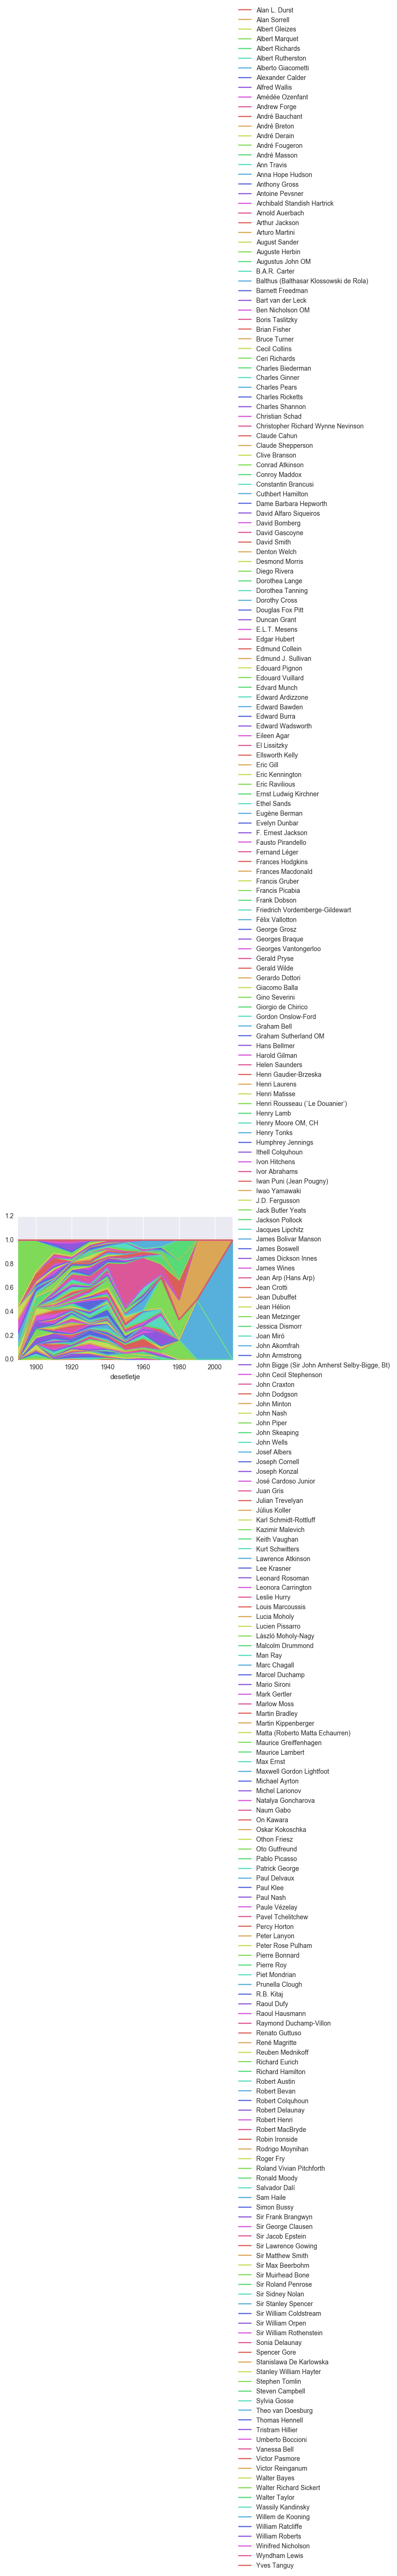

In [331]:
matrika_zastopanosti = zastopanost_umetnikov.unstack()
matrika_popularnosti = matrika_zastopanosti.apply(lambda st: st / st.sum(), axis=1)
matrika_popularnosti.plot(kind='area')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [319]:
#umetnine_po_razstavi.plot.scatter(x='leto začetka nastajanja', y='leto zaključka nastajanja', grid=True, subplots=True, figsize=(6, 6), sharex=False)

Sledita zastopanosti umetnikov po galeriji ali muzeji in razstavi.

In [332]:
zastopanost_g_ali_m = umetnine\
    .groupby(['galerija ali muzej', 'umetnik'])\
    .size()
zastopanost_g_ali_m

galerija ali muzej                            umetnik               
Barbara Hepworth Museum and Sculpture Garden  Dame Barbara Hepworth     5
Tate Britain                                  Albert Rutherston         1
                                              Alfred Wallis             1
                                              Ben Nicholson OM          3
                                              Bruce Turner              1
                                              Ceri Richards             1
                                                                       ..
View by appointment                           Spencer Gore              1
                                              Stanley William Hayter    1
                                              Walter Richard Sickert    4
                                              Walter Taylor             1
                                              Willem de Kooning         1
                                           

In [333]:
zastopanost_razstava = umetnine\
    .groupby(['razstava', 'umetnik'])\
    .size()
zastopanost_razstava

razstava                     umetnik                                      
BP Spotlights                Henry Moore OM, CH                                4
                             Walter Richard Sickert                            7
BP Walk through British Art  Albert Rutherston                                 1
                             Alfred Wallis                                     1
                             Ben Nicholson OM                                  3
                             Bruce Turner                                      1
                                                                              ..
Museum and Sculpture Garden  Dame Barbara Hepworth                             5
Paul Nash                    Dame Barbara Hepworth                             1
                             Edward Wadsworth                                  1
                             Eileen Agar                                       2
                             John 

Po zgledu primera naivnega bajesovega kvantifikatorja s predavanj in prilagoditvi kode, preverimo če je mogoče na podlago naslova dela ugotoviti kdo je umetnik.

In [334]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    return pd.Series(list({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

def koreni_umetnin(nizi):
    return nizi[nizi.notnull()].apply(
        koreni_besed
    ).stack().reset_index(level=1, drop=True)

def verjetnosti_po_umetnikih(dogodki_po_umetninah):
    dogodki_po_umetninah.name = 'dogodek'
    dogodki_po_umetnikih = umetnine.join(pd.DataFrame(dogodki_po_umetninah))
    pogostost_dogodkov = pd.crosstab(dogodki_po_umetnikih.dogodek, dogodki_po_umetnikih.umetnik)
    pogostost_dogodkov += (10**(-5))
    return pogostost_dogodkov / pogostost_dogodkov.sum()

In [335]:
verjetnost_umetnika = umetnine.groupby('umetnik').size() / len(umetnine)
verjetnost_korena_naslova_pri_umetniku = verjetnosti_po_umetnikih(koreni_umetnin(umetnine['naslov']))


In [336]:
verjetnost_umetnika.sort_values()

umetnik
Jean Crotti               0.000865
Francis Gruber            0.000865
Frances Macdonald         0.000865
Martin Bradley            0.000865
Fausto Pirandello         0.000865
F. Ernest Jackson         0.000865
                            ...   
Graham Sutherland OM      0.019031
James Boswell             0.020761
Duncan Grant              0.022491
John Piper                0.025087
Walter Richard Sickert    0.035467
Naum Gabo                 0.070934
dtype: float64

In [349]:
verjetnost_korena_naslova_pri_umetniku['Dame Barbara Hepworth'].sort_values(ascending=False).head(10)

dogodek
form        0.106036
sculptur    0.075740
in          0.045444
an          0.045444
with        0.045444
thr         0.030296
echelon     0.030296
figur       0.030296
eikon       0.030296
            0.030296
Name: Dame Barbara Hepworth, dtype: float64

In [338]:
def doloci_umetnika_iz_naslova(naslov=''):
    faktorji_umetnikov = 1 * verjetnost_umetnika
    faktorji_umetnikov *= verjetnost_korena_naslova_pri_umetniku[
            verjetnost_korena_naslova_pri_umetniku.index.isin(
                koreni_besed(naslov)
            )
        ].prod()
    faktorji_umetnikov /= max(faktorji_umetnikov)
    return faktorji_umetnikov.sort_values(ascending=False).head(5)

Sumljivo dobro deluje:

In [339]:
doloci_umetnika_iz_naslova(naslov='Casualty Clearing Station in France')


umetnik
Claude Shepperson         1.000000e+00
Sir William Coldstream    1.245339e-17
Anthony Gross             2.172625e-18
Duncan Grant              1.105336e-18
Gino Severini             2.097968e-19
dtype: float64

In [340]:
doloci_umetnika_iz_naslova(naslov='Rule Britannia')

umetnik
Spencer Gore           1.000000e+00
Sir William Orpen      1.769294e-08
James Dickson Innes    1.769294e-08
Brian Fisher           1.769294e-08
Ithell Colquhoun       1.769294e-08
dtype: float64

In [341]:
doloci_umetnika_iz_naslova(naslov='The Tea Pot')

umetnik
Mark Gertler           1.000000
André Fougeron         0.000023
Ethel Sands            0.000019
Josef Albers           0.000018
Jean Arp (Hans Arp)    0.000015
dtype: float64

In [342]:
doloci_umetnika_iz_naslova(naslov='Standing Nude')

umetnik
Henri Matisse             1.000000
Sir William Coldstream    0.305932
Auguste Herbin            0.000078
B.A.R. Carter             0.000020
Andrew Forge              0.000005
dtype: float64

In [343]:
doloci_umetnika_iz_naslova(naslov='Rain')

umetnik
Louis Marcoussis                                 1.000000
Jack Butler Yeats                                0.683074
Constantin Brancusi                              0.000030
Wassily Kandinsky                                0.000030
John Bigge (Sir John Amherst Selby-Bigge, Bt)    0.000030
dtype: float64

In se moramo, da najdemo primer napačnega rezultata, kar nekoliko potruditi.

In [348]:
doloci_umetnika_iz_naslova(naslov='Abstract I')

umetnik
Julian Trevelyan    1.000000
Edward Wadsworth    0.720219
John Piper          0.687111
Ivon Hitchens       0.619068
Vanessa Bell        0.357208
dtype: float64

Za zaključek si poglejmo le še vrste komentarjev, ki smo jih v podatkih pridobili z letnico in jih zanemarili.

In [347]:
umetnine['prefiksni komentar letnice'].value_counts()

c.                 236
?c.                  5
?                    3
exhibited            2
?exhibited           1
date not known       1
After                1
Name: prefiksni komentar letnice, dtype: int64

In [346]:
umetnine['dodatni komentar ob letnici'].value_counts()

s                           3
, editioned replica 1973    2
, cast 1961                 2
, replica 1964              2
, cast 1963                 2
, reassembled 1986          2
                           ..
, cast c.1965–6             1
, c.1929–35                 1
, cast ?1964                1
, cast 1964                 1
, printed 1991              1
, ?1930s                    1
Name: dodatni komentar ob letnici, dtype: int64